# PMGen Colab Notebook

<p align="center">
  <img src="https://raw.githubusercontent.com/soedinglab/PMGen/master/PMGen_logo.png" width="200"/>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](YOUR_COLAB_LINK)
[![GitHub](https://img.shields.io/github/stars/soedinglab/PMGen?style=social)](https://github.com/soedinglab/PMGen)
[![License](https://img.shields.io/badge/license-MIT-blue.svg)](LICENSE)

<p>
  This notebook provides a simple, user-friendly interface to run
  <strong>Peptide MHC Generator (PMGen)</strong>, an integrated framework for predicting,
  modeling, and generating peptides across both MHC classes and a broad range of peptide lengths.
</p>

<p>
  PMGen enhances <em>AlphaFold</em> predictions by incorporating anchor residue information
  into the structural module. It supports the generation of diverse, high-affinity peptides
  with minimal structural deviation and accurately models the effects of single-point mutations
  in benchmark neoantigen–wild-type pairs.
</p>

<p>
  🔗 <a href="https://github.com/soedinglab/PMGen" target="_blank">
  PMGen GitHub Repository
  </a>
</p>

---
## Table of Contents


>[1. Installation and Environment Setup](#scrollTo=jbvjbg1WZV02)

>[2. Helper Functions](#scrollTo=Epc235vX_-0s)

>[3. Input Definition and Running the Prediction](#scrollTo=WGFc0W0Bx2Ak)

>[4. Visualization of Predicted Structures](#scrollTo=wiiEV4FFrg3a)

>[5. ProteinMPNN Structure Generation](#scrollTo=_zSsEfHDs-KZ)

>[6. Visualization of Generated Peptide Variants](#scrollTo=M6HE3zNE8p2I)

>[7. Instructions](#scrollTo=PGfmM8lhBKsl&line=3&uniqifier=1)




-----
## 1. Installation and Environment Setup

Run these cells once to set up the environment (~10-15 minutes).



In [ ]:
#@title Miniconda Installation
%%bash
if [ ! -d "$HOME/miniconda" ]; then
  wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
  bash Miniconda3-latest-Linux-x86_64.sh -b -p $HOME/miniconda
fi

source $HOME/miniconda/etc/profile.d/conda.sh

conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r

PREFIX=/root/miniconda
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/miniconda
accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r


In [ ]:
#@title Repo Cloning
%%bash
cd /content
if [ ! -d "PMGen" ]; then
  git clone https://github.com/soedinglab/PMGen.git
else
  echo "PMGen is already cloned!"
fi

Cloning into 'PMGen'...


### PMGen Dependencies

In [ ]:
%%bash
export PATH="$HOME/miniconda/bin:$PATH" # Add miniconda to PATH explicitly to ensure `conda` is found
source $HOME/miniconda/etc/profile.d/conda.sh
cd /content/PMGen

if [ ! -d "$HOME/miniconda/envs/PMGen" ]; then
  bash -l install.sh --no_modeller
else
 echo "PMGen environment is already created!"
fi

# mention no netmhcpan and no modeller

 Starting Installation: PMGen
 Thank you for using our tool!
### References for the tools used in this pipeline ###
1. PANDORA - GitHub: https://github.com/X-lab-3D/PANDORA
   Paper: https://www.frontiersin.org/articles/10.3389/fimmu.2022.878762/full
2. AFfine - GitHub: https://github.com/phbradley/alphafold_finetune
   Paper: https://www.pnas.org/doi/abs/10.1073/pnas.2216697120
3. Modeller - Website: https://salilab.org/modeller/
   Paper: A. Fiser, R.K. Do, & A. Sali. Modeling of loops in protein structures, Protein Science 9. 1753-1773, 2000.
4. AlphaFold - GitHub: https://github.com/google-deepmind/alphafold
   Paper: https://www.nature.com/articles/s41586-021-03819-2
5. ProteinMPNN - Github https://github.com/dauparas/ProteinMPNN
   Paper: https://www.science.org/doi/10.1126/science.add2187
########################################################
⚡ No Modeller version being installed
✔ Modeller license key has been set to NOMODELLERKEY.
⚠ Mamba not found! Falling back to Conda.
✔ 



==> WARNING: A newer version of conda exists. <==
    current version: 25.11.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda


  DEPRECATION: Legacy editable install of CSB-PANDORA==2.0.0 from file:///content/PMGen/PANDORA (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


==> WARNING: A newer version of conda exists. <==
    current version: 25.11.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda


/root/miniconda/envs/PMGen/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: 

In [ ]:
%%bash
source $HOME/miniconda/etc/profile.d/conda.sh
conda activate PMGen

echo "Attempting to fix CUDA compatibility issues..."

# Uninstall potentially incompatible PyTorch and cudatoolkit versions
conda uninstall pytorch torchvision torchaudio cudatoolkit -y --force

# Install PyTorch with CUDA 11.8 using pip (often more reliable for Colab compatibility)
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

echo "PyTorch reinstalled with CUDA 11.8. Verifying..."

# Verify PyTorch CUDA installation
python -c "import torch; print(f'CUDA available: {torch.cuda.is_available()}'); print(f'CUDA device count: {torch.cuda.device_count()}'); print(f'PyTorch CUDA version: {torch.version.cuda}')"

# Ensure cuda-nvcc is still present if the PMGen scripts explicitly need it
if conda list | grep -q "cuda-nvcc"; then
    echo "CUDA toolkit (nvcc) is already installed"
else
    echo "Installing CUDA toolkit (nvcc) if needed..."
    conda install -c nvidia cuda-nvcc cuda-nvprof -y
fi


Attempting to fix CUDA compatibility issues...
Jupyter detected...
2 channel Terms of Service accepted
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━


PackagesNotFoundError: The following packages are missing from the target environment:

  - torchaudio
  - pytorch
  - torchvision




==> WARNING: A newer version of conda exists. <==
    current version: 25.11.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




---
## 2. Helper Functions

Utility functions for file handling, visualization, and analysis.

In [ ]:
#@title Python Imports

# =============================================================================
# STANDARD LIBRARY
# =============================================================================
import os                      # File system operations
import shutil                  # File copying, moving, archiving
import subprocess              # Execute shell commands
import zipfile                 # Zip file handling
import hashlib                 # Verifying file integrity
from datetime import datetime  # Timestamps and date handling
from pathlib import Path       # Path manipulation
from typing import Optional

# =============================================================================
# SCIENTIFIC COMPUTING
# =============================================================================
import pandas as pd            # DataFrames and data analysis
import numpy as np             # Numerical arrays and operations

# Scipy clustering utilities
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# =============================================================================
# GOOGLE COLAB
# =============================================================================
from google.colab import files  # File upload/download
from google.colab import drive  # Google Drive integration
from google.colab import data_table  # Better table display

# =============================================================================
# VISUALIZATION & BIOLOGY
# =============================================================================
def ensure_required_packages():
    """
    Install packages not pre-installed in Colab.

    """
    packages_to_check = {
        'py3Dmol': 'py3Dmol',
        'Bio.PDB': 'biopython',
        'matplotlib.pyplot': 'matplotlib',
        'biopandas': 'biopandas',
        'prody': 'prody',
        'plotly': 'plotly'
    }
    missing = []
    for module_name, package_name in packages_to_check.items():
        try:
            __import__(module_name)
        except ImportError:
            missing.append(package_name)

    if missing:
        print(f"Installing: {', '.join(missing)}")
        !pip install -q {' '.join(missing)}
        print("Installation complete")
    else:
        print("All required packages already installed")

# Install if needed
ensure_required_packages()
# Import visualization packages
import py3Dmol                                  # 3D molecular viewer
import plotly.express as px                     # Interactive plotting
import matplotlib.pyplot as plt                 # Plotting
from matplotlib.colors import LinearSegmentedColormap  # Custom colormaps
from matplotlib.patches import Patch            # Plot annotations
from IPython.display import display, Markdown


# Import biology packages
import Bio.PDB as PDB                           # PDB file parsing
from Bio.Align import substitution_matrices     # BLOSUM62 matrix
from biopandas.pdb import PandasPdb             # Reading and manipulating PDB files as pandas DataFrames
from prody import parsePDBHeader                # Extracting structural metadata from PDB headers

print("All imports loaded successfully")

pd.set_option('future.no_silent_downcasting', True)

Installing: py3Dmol, biopython, biopandas, prody
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.1 MB/s eta 0:00:00
Installation complete
All imports loaded successfully


In [ ]:
#@title Running Check

def hash_file(path: Path) -> str:
    """Compute SHA256 hash of a file."""
    h = hashlib.sha256()
    with open(path, "rb") as f:
        h.update(f.read())
    return h.hexdigest()

def write_success_marker(marker_path: Path, input_tsv: Path):
    """Write input hash to success marker after successful run."""
    marker_path.parent.mkdir(parents=True, exist_ok=True)
    marker_path.write_text(hash_file(input_tsv))

def proteinmpnn_needs_run(input_tsv: Path, alphafold_dir: Path):
    if not input_tsv.exists():
        print("Input TSV missing → will run PMGen")
        return True

    if not alphafold_dir.exists():
        print("Output directory missing → will run PMGen")
        return True

    success_marker = alphafold_dir / ".PMGEN_SUCCESS"
    if not success_marker.exists():
        print("Previous run incomplete or interrupted → will re-run PMGen")
        return True

    previous_hash = success_marker.read_text().strip()
    current_hash = hash_file(input_tsv)

    if previous_hash != current_hash:
        print("Input TSV changed → will re-run PMGen")
        return True

    print("PMGen already completed successfully with identical inputs → skipping")
    return False

In [ ]:
#@title File & Path Utilities

# Save a folder to Google Drive with timestamp.
def save_to_google_drive_func(source_dir, prefix="PMGen_Output"):

    if not os.path.isdir(source_dir):
        raise RuntimeError(f"Source directory '{source_dir}' does not exist.")

    drive.mount("/content/drive")

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    destination_dir = f"/content/drive/My Drive/{prefix}_{timestamp}"

    os.makedirs(destination_dir, exist_ok=True)
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

    print(f"Output directory '{source_dir}' saved to Google Drive at '{destination_dir}'")


# Save a folder to PC as a zip and download it.
def save_to_pc_func(source_dir, prefix="PMGen_Output"):

    if not os.path.isdir(source_dir):
        raise RuntimeError(f"Source directory '{source_dir}' does not exist.")

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    zip_base = f"/content/{prefix}_{timestamp}"

    zip_path = shutil.make_archive(
        zip_base,
        "zip",
        root_dir=source_dir,
        base_dir="."
    )

    files.download(zip_path)
    print(f"Download ready: {os.path.basename(zip_path)}")


#Upload a zipped folder from local PC and extract it directly into `target_dir`, flattening a single top-level folder if present.
def upload_and_extract_zip(target_dir):

    print(f"Please upload the zip for {target_dir}:")
    uploaded = files.upload()

    if not uploaded:
        raise RuntimeError("No file uploaded.")

    uploaded_filename = list(uploaded.keys())[0]
    print(f"Uploaded: {uploaded_filename}")

    # Reset target directory
    if os.path.exists(target_dir):
        shutil.rmtree(target_dir)
    os.makedirs(target_dir)

    with zipfile.ZipFile(uploaded_filename, "r") as zip_ref:
        members = zip_ref.namelist()

        # Detect top-level folder in zip
        top_levels = {m.split("/")[0] for m in members if "/" in m}
        strip_prefix = None
        if len(top_levels) == 1:
            strip_prefix = list(top_levels)[0] + "/"
            print(f"Flattening top-level folder: {strip_prefix}")

        for member in members:
            if member.endswith("/"):
                continue  # skip directories

            # Strip prefix if present
            if strip_prefix and member.startswith(strip_prefix):
                relative_path = member[len(strip_prefix):]
            else:
                relative_path = member

            if not relative_path:
                continue

            # Write file to target directory
            target_path = os.path.join(target_dir, relative_path)
            os.makedirs(os.path.dirname(target_path), exist_ok=True)

            with zip_ref.open(member) as source, open(target_path, "wb") as target:
                shutil.copyfileobj(source, target)

    # Cleanup
    os.remove(uploaded_filename)
    print(f"Contents extracted directly into: {target_dir}\n")

In [ ]:
#@title Visualization Functions

# Load a PDB, assign pLDDT scores to B-factors, and save.
def color_pdb_by_plddt(pdb_in: str, plddt_npy: str, pdb_out: str) -> None:
    plddt = np.load(plddt_npy)
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("model", pdb_in)
    res_idx = 0
    for model in structure:
        for chain in model:
            for residue in chain:
                if res_idx >= len(plddt):
                    break
                for atom in residue:
                    atom.set_bfactor(float(plddt[res_idx]))
                res_idx += 1
    io = PDB.PDBIO()
    io.set_structure(structure)
    io.save(pdb_out)

# Show PDB colored by B-factor (pLDDT) in py3Dmol.
def show_plddt_3d(pdb_colored: str, width: int = 800, height: int = 500):
    view = py3Dmol.view(width=width, height=height)
    view.addModel(open(pdb_colored).read(), "pdb")
    view.setStyle(
        {"cartoon": {"colorscheme": {"prop": "b", "gradient": "roygb", "min": 50, "max": 100}}}
    )
    view.zoomTo()
    return view.show()

# Show PDB colored N -> C -> O in py3Dmol.
def show_peptide_3d(pdb_in: str, width: int = 800, height: int = 500):
    view = py3Dmol.view(width=width, height=height)
    view.addModel(open(pdb_in).read(), "pdb")
    view.setStyle(
        {"cartoon": {"color": "spectrum"}}
    )
    view.zoomTo()
    return view.show()

# Show the two chains in different colors in py3Dmol.
def show_multichain_pdb(pdb_path: str, ligand_resn: str = "UH7"):
    view = py3Dmol.view(width=800, height=500)
    view.addModel(open(pdb_path).read(), "pdb")
    view.setStyle({"chain": "A"}, {"cartoon": {"color": "purple"}})
    view.addStyle({"chain": "P"}, {"cartoon": {"color": "yellowCarbon"}})
    view.addStyle({"within": {"distance": 5, "sel": {"resn": ligand_resn}}}, {"stick": {}})
    view.zoomTo()
    view.show()

def plot_plddt_curve_interactive(plddt_npy: str):
    """
    Plot pLDDT per residue as an interactive scatter plot using Plotly.

    Args:
        plddt_npy (str): Path to the pLDDT numpy file (.npy)
    """
    plddt = np.load(plddt_npy)
    residue_indices = np.arange(1, len(plddt)+1)

    # Define the ROYGB colormap as a list of colors
    roygb_colors = ["red", "orange", "yellow", "green", "blue"]

    # Use Plotly scatter plot
    fig = px.scatter(
        x=residue_indices,
        y=plddt,
        color=plddt,
        color_continuous_scale=roygb_colors,
        range_color=[50, 100],
        labels={"x": "Residue index", "y": "pLDDT", "color": "pLDDT"},
        title="pLDDT per Residue (interactive, ROYGB)"
    )

    fig.update_traces(marker=dict(size=8))
    fig.update_layout(
        xaxis=dict(title="Residue index"),
        yaxis=dict(title="pLDDT", range=[0, 100])
    )

    fig.show()


# Plot PAE heatmap with a roygb colormap.
def plot_pae_heatmap(pae_npy: str, peptide_id: str):
    roygb = LinearSegmentedColormap.from_list(
        "roygb", ["blue", "green", "yellow", "orange", "red"]
    )
    pae = np.load(pae_npy)
    fig = px.imshow(
        pae,
        color_continuous_scale='Viridis',  # or any colormap
        labels=dict(x="Residue i", y="Residue j", color="Error (Å)"),
        x=np.arange(1, pae.shape[0]+1),
        y=np.arange(1, pae.shape[1]+1),
        text_auto=True  # optional: show values inside cells
    )

    fig.update_layout(
        title=f"Predicted Aligned Error (PAE) for {peptide_id}",
        xaxis_title="Residue i",
        yaxis_title="Residue j",
        width=700,
        height=700
    )

    fig.show()

# reference: https://medium.com/@jgbrasier/working-with-pdb-files-in-python-7b538ee1b5e4
def read_pdb_to_dataframe(
    pdb_path: Optional[str] = None,
    model_index: int = 1,
    parse_header: bool = True,
    ) -> pd.DataFrame:
    """
    Read a PDB file, and return a Pandas DataFrame containing the atomic coordinates and metadata.

    Args:
        pdb_path (str, optional): Path to a local PDB file to read. Defaults to None.
        model_index (int, optional): Index of the model to extract from the PDB file, in case
            it contains multiple models. Defaults to 1.
        parse_header (bool, optional): Whether to parse the PDB header and extract metadata.
            Defaults to True.

    Returns:
        pd.DataFrame: A DataFrame containing the atomic coordinates and metadata, with one row
            per atom
    """
    atomic_df = PandasPdb().read_pdb(pdb_path)
    if parse_header:
        header = parsePDBHeader(pdb_path)
    else:
        header = None
    atomic_df = atomic_df.get_model(model_index)
    if len(atomic_df.df["ATOM"]) == 0:
        raise ValueError(f"No model found for index: {model_index}")

    return pd.concat([atomic_df.df["ATOM"], atomic_df.df["HETATM"]]), header


def show_plotly_scatter(df, color: str):
    """
    Display a 3D scatter plot of atomic coordinates colored by B-factor (pLDDT).

    Args:
        df (pd.DataFrame): DataFrame containing at least the following columns:
            - 'x_coord', 'y_coord', 'z_coord'
            - 'b_factor'
            - 'atom_name', 'residue_name', 'residue_number', 'chain_id', 'element_symbol'
    """
    fig = px.scatter_3d(
        df,
        x='x_coord',
        y='y_coord',
        z='z_coord',
        color=f'{color}',
        hover_name='atom_name',
        hover_data={
            'residue_name': True,
            'residue_number': True,
            'chain_id': True,
            'element_symbol': True,
            'x_coord': False,
            'y_coord': False,
            'z_coord': False
        }
    )
    fig.update_traces(marker_size=4)
    fig.update_layout(
        title="3D Scatter Colored by pLDDT",
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        )
    )
    fig.show()


# Visualizing Original and Sample Sequences
def seq_visualized(peptide_id, peptide_id_best):
  original_peptide_sequence = final_df.loc[final_df["unique_ids"] == peptide_id, "peptide"].iloc[0]
  sequences_fa = f"/content/PMGen/output/protienmpnn/{peptide_id_best}/{peptide_id_best}_model_1_model_2_ptm/peptide_design/seqs/multichain_{peptide_id_best}_model_1_model_2_ptm.fa"
  sequences_fa_df = pd.read_csv(sequences_fa, sep="\t", header=None)
  peptides_from_fa = [seq for seq in sequences_fa_df[0].tolist() if not seq.startswith('>')]

  generated_peptides = peptides_from_fa[1:]

  list_ids = [
      f"{peptide_id_best}_{i}"
      for i in range(1, len(generated_peptides) + 1)
  ]

  # dictionary
  peptide_dict = {
      f"{peptide_id_best}": original_peptide_sequence
  }

  for i, seq in enumerate(generated_peptides, start=1):
      peptide_dict[f"{peptide_id_best}_{i}"] = seq


  #No alignment needed so:
  seq_ids = list(peptide_dict.keys())
  n_seqs = len(seq_ids)
  seqs = list(peptide_dict.values())
  seq_len = len(seqs[0])

  aa_categories = {
      "Hydrophobic (A,V,I,L,M)": {
          "aas": ["A", "V", "I", "L", "M"],
          "color": "#C8C8C8"
      },
      "Aromatic (F,W,Y)": {
          "aas": ["F", "W", "Y"],
          "color": "#0000FF"
      },
      "Polar uncharged (S,T,N,Q)": {
          "aas": ["S", "T", "N", "Q"],
          "color": "#FF00FF"
      },
      "Acidic (D,E)": {
          "aas": ["D", "E"],
          "color": "#FF0000"
      },
      "Basic (K,R,H)": {
          "aas": ["K", "R", "H"],
          "color": "#008000"
      },
      "Special (G,P)": {
          "aas": ["G", "P"],
          "color": "#FFA500"
      }
  }

  aa_colors = {}
  for info in aa_categories.values():
      for aa in info["aas"]:
          aa_colors[aa] = info["color"]

  fig, ax = plt.subplots(figsize=(seq_len / 2, n_seqs))

  for i, seq in enumerate(seqs):
      for j, aa in enumerate(seq):

          # background cell
          ax.add_patch(
              plt.Rectangle(
                  (j, n_seqs - i - 1),
                  1, 1,
                  facecolor="white",
                  edgecolor="lightgray",
                  linewidth=0.5
              )
          )

          # amino acid letter
          ax.text(
              j + 0.5,
              n_seqs - i - 1 + 0.5,
              aa,
              ha="center",
              va="center",
              fontsize=10,
              fontweight="bold",
              color=aa_colors.get(aa, "black")
          )

  ax.set_xticks(np.arange(seq_len) + 0.5)
  ax.set_xticklabels(range(1, seq_len + 1))

  ax.set_yticks(np.arange(n_seqs) + 0.5)
  ax.set_yticklabels(seq_ids[::-1])

  ax.set_xlim(0, seq_len)
  ax.set_ylim(0, n_seqs)
  ax.set_xlabel("Position")
  ax.set_ylabel("Peptide ID")
  ax.set_title("Position-based peptide coloring")
  ax.set_aspect("equal")

  legend_elements = [
      Patch(facecolor=info["color"], edgecolor="black", label=label)
      for label, info in aa_categories.items()
  ]

  ax.legend(
      handles=legend_elements,
      title="Amino acid properties",
      bbox_to_anchor=(1.02, 1),
      loc="upper left",
      borderaxespad=0
  )

  plt.show()


# Superimposing the two peptides
def superimpose_pdb(ref_pdb_path: str, sample_pdb_path: str, protein_id_best: str, variant_num: str):

  MHC_CHAIN_ID = "A"      # MHC heavy chain
  PEPTIDE_CHAIN_ID = "P"  # peptide chain

  # Parse structures
  parser = PDB.PDBParser(QUIET=True)
  ref_structure = parser.get_structure("ref", ref_pdb_path)
  sample_structure = parser.get_structure("sample", sample_pdb_path)

  # Use first model only
  ref_model = ref_structure[0]
  sample_model = sample_structure[0]

  # ---------------- MHC ALIGNMENT ----------------
  def get_ca_atoms(chain):
      return [
          res["CA"]
          for res in chain
          if res.id[0] == " " and "CA" in res
      ]

  ref_mhc_atoms = get_ca_atoms(ref_model[MHC_CHAIN_ID])
  sample_mhc_atoms = get_ca_atoms(sample_model[MHC_CHAIN_ID])

  assert len(ref_mhc_atoms) == len(sample_mhc_atoms), "MHC CA atom count mismatch"

  sup = PDB.Superimposer()
  sup.set_atoms(ref_mhc_atoms, sample_mhc_atoms)
  sup.apply(sample_model.get_atoms())

  print(f"MHC Cα RMSD (alignment): {sup.rms:.2f} Å")

  # ---------------- PEPTIDE COMPARISON ----------------
  ref_peptide = ref_model[PEPTIDE_CHAIN_ID]
  sample_peptide = sample_model[PEPTIDE_CHAIN_ID]

  ref_atoms = []
  sample_atoms = []
  residue_numbers = []

  for ref_res in ref_peptide:
      if ref_res.id[0] != " ":
          continue

      res_id = ref_res.id
      if res_id in sample_peptide and "CA" in ref_res and "CA" in sample_peptide[res_id]:
          ref_atoms.append(ref_res["CA"])
          sample_atoms.append(sample_peptide[res_id]["CA"])
          residue_numbers.append(res_id[1])

  assert len(ref_atoms) > 0, "No peptide residues matched"

  # Per-residue RMSD
  per_res_rmsd = np.array([
      np.linalg.norm(ref.coord - samp.coord)
      for ref, samp in zip(ref_atoms, sample_atoms)
  ])

  print(f"Mean peptide Cα RMSD: {per_res_rmsd.mean():.2f} Å")

  # ---------------- PLOT ----------------
  plt.figure(figsize=(10, 4))
  plt.plot(residue_numbers, per_res_rmsd, marker="o", linewidth=1)
  plt.xlabel("Peptide residue number")
  plt.ylabel("Cα RMSD (Å)")
  plt.title("Peptide deviation after MHC-based superposition")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # ---------------- SAVE ALIGNED STRUCTURE ----------------
  io = PDB.PDBIO()
  io.set_structure(sample_structure)
  io.save(f"/content/{peptide_id_best}_{variant_num}_aligned_on_MHC.pdb")


def view_superimposed_pdb(ref_pdb_path: str, aligned_pdb: str):

  view = py3Dmol.view(width=800, height=500)

  # Reference structure
  view.addModel(open(ref_pdb_path).read(), "pdb")
  view.setStyle(
      {"model": 0},
      {"cartoon": {"color": "lightgray"}}
  )

  # Aligned structure
  view.addModel(open(aligned_pdb).read(), "pdb")
  view.setStyle(
      {"model": 1},
      {"cartoon": {'color': 'red'}}
  )

  view.zoomTo()
  view.show()


---
## 3. Input Definition and Running the Prediction

(Time taken depends on the quantity of the input.)

In [ ]:
# -------------------------------
# User Input
# -------------------------------
#@markdown <br> Insert your input below </br>
#@markdown - peptide: Peptide sequence(s)
#@markdown - mhc_seq: MHC sequence(s) (for MHC-II: Alpha/Beta separated by /)
#@markdown - mhc_type: 1 for MHC-I, 2 for MHC-II
#@markdown - anchors: Anchor positions
#@markdown - id: Unique identifier

#@markdown If there are multiple inputs, separate by ` : `

# Manually Adding Inputs
peptides = "NLVPMVATV: LLFGYPVYV" #@param {type:"string"}
#@markdown
mhc_sequences = "AGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGCYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMCAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDA: GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAP" #@param {type:"string"}
#@markdown
mhc_types = "1:1" #@param {type:"string"}
#@markdown
anchor_positions_optional = "1;9:1;9" #@param {type:"string"}
#@markdown
sample_ids = "6Q3K_0: 6UZ1_0" #@param {type:"string"}

#@markdown

#@markdown If your input is larger, you can uplaod a file instead

# Uploading a tsv file
use_tsv_file = False #@param {type:"boolean"}

#@markdown

#@markdown **Save Settings**
save_to_google_drive = False #@param {type:"boolean"}
save_to_pc = True #@param {type:"boolean"}

#@markdown


# -------------------------------
# Validate Input
# -------------------------------
if use_tsv_file:
  uploaded = files.upload()
  if uploaded:
    input_file = list(uploaded.keys())[0]
    input_df = pd.read_csv(input_file, sep="\t")

    # Checks on tsv file
    if input_df.shape[1] != 5:
      raise ValueError("Input file must have 5 columns: peptide, mhc_seq, mhc_type, anchors, id")

    if input_df.shape[0] == 0:
      raise ValueError("Input file must not be empty")

    if input_df.drop(columns=["anchors"]).isnull().values.any():
      raise ValueError("Input file must not contain empty cells except anchors")

    if not input_df["peptide"].str.match(r'^[A-Z]+$').all():
      raise ValueError("Peptide sequence must only contain uppercase letters")

    if not input_df["mhc_seq"].str.match(r'^[A-Z/]+$').all():
      raise ValueError("MHC sequence must only contain uppercase letters and '/'")

    if not input_df["mhc_type"].isin([1, 2]).all():
      raise ValueError("mhc_type must be 1 or 2")

    anchors_ok = input_df["anchors"].isna() | input_df["anchors"].str.match(r'^\d+(;\d+)*$')
    if not anchors_ok.all():
        raise ValueError("Anchors must be empty or a semicolon-separated list of integers")

    for i, (seq, t) in enumerate(zip(input_df["mhc_seq"], input_df["mhc_type"])):
      if t == 2 and "/" not in seq:
        raise ValueError(f"MHC-II sequence must contain '/': row {i}")

    for i, (seq, t) in enumerate(zip(input_df["peptide"], input_df["mhc_type"])):
      if (t == 1 and (len(seq) < 8 or len(seq) > 15)) :
        raise ValueError("Peptide length must be between 8 and 15 for MHC-I")
      elif (t == 2 and (len(seq) < 11 or len(seq) > 30)):
        raise ValueError("Peptide length must be between 11 and 30 for MHC-II")

  else:
    print("No file uploaded!")
    import sys
    sys.exit()

else:
    # Removing Whitespace
    peptides = "".join(peptides.split())
    mhc_sequences = "".join(mhc_sequences.split())
    anchor_positions= "".join(anchor_positions_optional.split())
    mhc_types = "".join(mhc_types.split())
    sample_ids = "".join(sample_ids.split())

    # Splitting Multiple Inputs
    peptides = peptides.split(":")
    mhc_sequences = mhc_sequences.split(":")
    if anchor_positions == "":
      anchor_positions = [""] * len(peptides)
    else:
        anchor_positions = anchor_positions.split(":")
    mhc_types = mhc_types.split(":")
    sample_ids = sample_ids.split(":")

    # Checking Row Alignment
    lengths = [
        len(peptides),
        len(mhc_sequences),
        len(anchor_positions),
        len(mhc_types),
        len(sample_ids)
    ]
    if len(set(lengths)) > 1:
      raise ValueError("All inputs must have the same number of columns.")

    # Checking MHC Type
    for t in mhc_types:
        if t not in ("1", "2"):
            raise ValueError("mhc_type must be 1 or 2")

    # MHC 2 sequence format check
    for i, (seq, t) in enumerate(zip(mhc_sequences, mhc_types)):
        if t == "2" and "/" not in seq:
            raise ValueError(f"MHC-II sequence must contain '/': row {i}")

    # Peptide lengths
    for i, (seq, t) in enumerate(zip(peptides, mhc_types)):
        if (t == "1" and (len(seq) < 8 or len(seq) > 15)) :
            raise ValueError("Peptide length must be between 8 and 15 for MHC-I")
        elif (t == "2" and (len(seq) < 11 or len(seq) > 30)) :
            raise ValueError("Peptide length must be between 11 and 30 for MHC-II")

    for i, anc in enumerate(anchor_positions):
      if anc != "" and not pd.Series([anc]).str.match(r'^\d+(;\d+)*$').iloc[0]:
          raise ValueError(f"Invalid anchor format at row {i}")

    input_df = pd.DataFrame({
        "peptide": peptides,
        "mhc_seq": mhc_sequences,
        "mhc_type": mhc_types,
        "anchors": anchor_positions,
        "id": sample_ids
    })
    input_df["anchors"] = input_df["anchors"].fillna("")


# -------------------------------
# Define paths
# -------------------------------
output_path = "/content/PMGen/input_pmgen.tsv"
input_df.to_csv(output_path, sep = "\t", index = False)
print("saved:", output_path)

INPUT_TSV = Path("/content/PMGen/input_pmgen.tsv")
ALPHAFOLD_DIR = Path("/content/PMGen/output/alphafold")
SUCCESS_MARKER = ALPHAFOLD_DIR / ".PMGEN_SUCCESS"


# -------------------------------
# PMGen bash command
# -------------------------------
cmd = """
source $HOME/miniconda/etc/profile.d/conda.sh
conda activate PMGen

export CUDA_LAUNCH_BLOCKING=1

stdbuf -oL -eL python -c "import torch; print(f'CUDA available: {torch.cuda.is_available()}'); print(f'CUDA device count: {torch.cuda.device_count()}')"

cd PMGen/
export XLA_FLAGS=--xla_gpu_cuda_data_dir=$HOME/miniconda/envs/PMGen
export PATH=$HOME/miniconda/envs/PMGen/bin:$PATH
export LD_LIBRARY_PATH=$HOME/miniconda/envs/PMGen/lib:$LD_LIBRARY_PATH

stdbuf -oL -eL python run_PMGen.py \
  --mode wrapper \
  --run single \
  --df /content/PMGen/input_pmgen.tsv \
  --output_dir output/ \
  --multiple_anchors \
  --best_structures \
  --initial_guess \
  --peptide_design \
  --proteinmpnn_model_name v_48_020 \
"""

if proteinmpnn_needs_run(INPUT_TSV, ALPHAFOLD_DIR):
  env = os.environ.copy()
  env["PYTHONUNBUFFERED"] = "1"

  process = subprocess.Popen(
      ["bash", "-lc", cmd],
      stdout=subprocess.PIPE,
      stderr=subprocess.STDOUT,
      text=True,
      bufsize=1,
      env=env
  )

  for line in process.stdout:
      print(line, end="")

  process.wait()

  if process.returncode != 0:
      raise RuntimeError(f"PMGen failed with exit code {process.returncode}")

  write_success_marker(SUCCESS_MARKER, INPUT_TSV)
  print("PMGen run completed and recorded")

  if save_to_google_drive:
    save_to_google_drive_func("/content/PMGen/output", prefix="PMGen_Output")

  if save_to_pc:
      save_to_pc_func("/content/PMGen/output", prefix="PMGen_Output")

else:
    print("PMGen run skipped.")

saved: /content/PMGen/input_pmgen.tsv
PMGen already completed successfully with identical inputs → skipping
PMGen run skipped.


---
## 4. Visualization of Predicted Structures



In [ ]:
#@markdown If you have a PMGen output folder on your local machine and want to visualize it directly without running PMGen, you should first compress that folder into a `.zip` file. Then, use this cell to upload the `.zip` file, and it will be extracted into the /content/PMGen/output directory.

upload_from = "pc" #@param ["pc","google drive"]

if upload_from == "pc":
  upload_and_extract_zip("/content/PMGen/output")
elif upload_from == "google drive":
  print("")

Please upload the zip for /content/PMGen/output:


Saving PMGen_Output_20260204_103900.zip to PMGen_Output_20260204_103900.zip
Uploaded: PMGen_Output_20260204_103900.zip
Contents extracted directly into: /content/PMGen/output



<div style='text-align:center'><h1>Visualizations for Peptide: 6Q3K_0</h1></div>

<div style='text-align:center'><h2>3D Structure (Spectrum Coloring)</h2></div>

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div style='text-align:center'><h2>Atomic Coordinates (3D Scatter)</h2></div>

<div style='text-align:center'><h2>3D Scatter Colored by pLDDT</h2></div>

<div style='text-align:center'><h2>Predicted Aligned Error (PAE) Heatmap</h2></div>

<div style='text-align:center'><h2>Cleaned Atomic Coordinates Table</h2></div>

atom_number atom_name residue_name chain_id  residue_number  x_coord  \
0               1         N          ALA        A               1  -23.520   
1               2        CA          ALA        A               1  -22.246   
2               3         C          ALA        A               1  -22.003   
3               4        CB          ALA        A               1  -21.099   
4               5         O          ALA        A               1  -22.236   
...           ...       ...          ...      ...             ...      ...   
1568         1569         C          VAL        P               9   10.721   
1569         1570        CB          VAL        P               9    8.707   
1570         1571         O          VAL        P               9   11.843   
1571         1572       CG1          VAL        P               9    7.437   
1572         1573       CG2          VAL        P               9    9.584   

      y_coord  z_coord element_symbol  line_idx  
0      -2.244    8.693              N         0  
1      -2.471    8.015              C         1  
2      -3.960    7.789              C         2  
3      -1.864    8.820              C         3  
4      -4.777    8.683              O         4  
...       ...      ...            ...       ...  
1568   -5.059  -10.885              C      1569  
1569   -3.546  -10.850              C      1570  
1570   -4.639  -10.589              O      1571  
1571   -3.162  -10.092              C      1572  
1572   -2.318  -11.087              C      1573  

[1573 rows x 10 columns]

<div style='text-align:center'><h2>Peptide Sequence Visualization</h2></div>

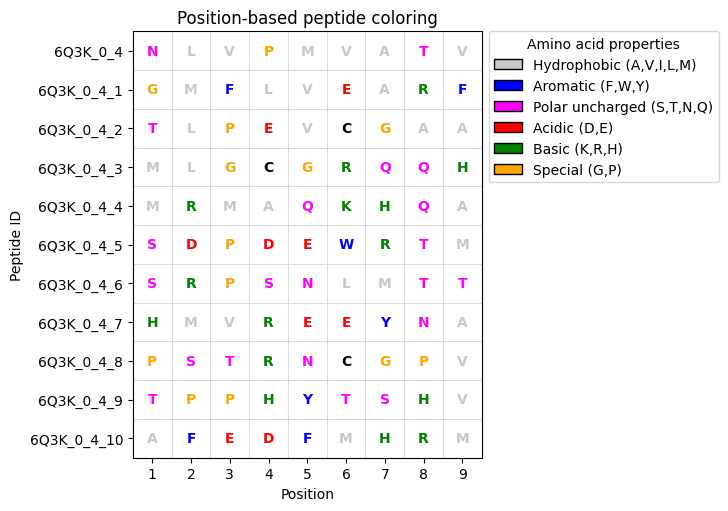

In [ ]:
data_table.enable_dataframe_formatter()


# -------------------------------
# User Input
# -------------------------------
peptide_id = "6Q3K_0"  #@param {type:"string"}
color = "Spectrum"        #@param ["pLDDT", "Spectrum", "Chains"]


# -------------------------------
# Check peptide exists
# -------------------------------
final_df = pd.read_csv("/content/PMGen/output/final_df.tsv", sep="\t")

if peptide_id not in final_df["unique_ids"].values:
    display(Markdown(f"<div style='text-align:center; color:red'><b> Invalid peptide ID: {peptide_id}</b></div>"))
    raise ValueError(f"Peptide {peptide_id} not found in final_df.tsv")

display(Markdown(f"<div style='text-align:center'><h1>Visualizations for Peptide: {peptide_id}</h1></div>"))


# -------------------------------
# Locate best structure
# -------------------------------
best_structures_dir = "/content/PMGen/output/best_structures"
best_structure_num = None

for fname in os.listdir(best_structures_dir):
    if fname.startswith(f"{peptide_id}_") and fname.endswith("_PMGen.pdb"):
        best_structure_num = int(fname.replace(f"{peptide_id}_", "").replace("_PMGen.pdb", ""))
        break

if best_structure_num is None:
    raise FileNotFoundError(f"No best structure found for {peptide_id}")

peptide_id_best = f"{peptide_id}_{best_structure_num}"


# -------------------------------
# Define file paths
# -------------------------------
alphafold_dir = f"/content/PMGen/output/alphafold/{peptide_id_best}"
plddt_path = os.path.join(alphafold_dir, f"{peptide_id_best}_model_1_model_2_ptm_plddt.npy")
pdb_path = os.path.join(alphafold_dir, f"{peptide_id_best}_model_1_model_2_ptm.pdb")
pdb_colored = "/content/plddt_colored.pdb"
pae_path = os.path.join(alphafold_dir, f"{peptide_id_best}_model_1_model_2_ptm_predicted_aligned_error.npy")
multichain_pdb_path = os.path.join(
    "/content/PMGen/output/protienmpnn",
    f"{peptide_id_best}",
    f"{peptide_id_best}_model_1_model_2_ptm",
    "multichain_pdb",
    f"multichain_{peptide_id_best}_model_1_model_2_ptm.pdb",
)


# -------------------------------
# Color PDB by pLDDT
# -------------------------------
color_pdb_by_plddt(pdb_path, plddt_path, pdb_colored)


# -------------------------------
# 3D Structure Visualization
# -------------------------------
if color == "Spectrum":
    display(Markdown("<div style='text-align:center'><h2>3D Structure (Spectrum Coloring)</h2></div>"))
    show_peptide_3d(pdb_colored)
elif color == "pLDDT":
    display(Markdown("<div style='text-align:center'><h2>3D Structure (pLDDT Coloring)</h2></div>"))
    show_plddt_3d(pdb_colored)
else:
    display(Markdown("<div style='text-align:center'><h2>Multichain Structure</h2></div>"))
    show_multichain_pdb(multichain_pdb_path)


# -------------------------------
# Multichain 3D Scatter Plot
# -------------------------------
df, header = read_pdb_to_dataframe(multichain_pdb_path)

display(Markdown("<div style='text-align:center'><h2>Atomic Coordinates (3D Scatter)</h2></div>"))

show_plotly_scatter(df, "chain_id")


# -------------------------------
# pLDDT Colored 3D Scatter
# -------------------------------
df, header = read_pdb_to_dataframe(pdb_colored)

display(Markdown("<div style='text-align:center'><h2>3D Scatter Colored by pLDDT</h2></div>"))

show_plotly_scatter(df, "b_factor")


# -------------------------------
# PAE Heatmap
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Predicted Aligned Error (PAE) Heatmap</h2></div>"))

plot_pae_heatmap(pae_path, peptide_id_best)


# -------------------------------
# Cleaned Atomic Coordinates Table
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Cleaned Atomic Coordinates Table</h2></div>"))

df, header = read_pdb_to_dataframe(multichain_pdb_path)
clean_df = (
    df.replace(r'^\s*$', np.nan, regex=True)
      .dropna(axis=1, how='all')
      .loc[:, lambda x: x.nunique(dropna=False) > 1]
)

display(clean_df)


# -------------------------------
# Sequence Visualization
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Peptide Sequence Visualization</h2></div>"))

seq_visualized(peptide_id, peptide_id_best)


---
## 5. ProteinMPNN Structure Generation

In [ ]:
# -------------------------------
# User Input
# -------------------------------
#@markdown Enter the id of the peptide of whose variants you would like to do structure prediction:

protein_id = "6UZ1_0"           #@param {type:"string"}
selection_mode = "top_m_similar"       #@param ["all","manual","top_m_similar","top_m_diverse"]
which_variants = ""        #@param {type:"string"}
top_m = 3                      #@param {type:"integer"}

#@markdown

#@markdown **Save Settings**
save_to_google_drive = False    #@param {type:"boolean"}
save_to_pc = True              #@param {type:"boolean"}

#@markdown


INPUT_TSV = Path("/content/PMGen/input_protein_mpnn.tsv")
ALPHAFOLD_DIR = Path("/content/PMGen/protein_mpnn_output/alphafold")
SUCCESS_MARKER = ALPHAFOLD_DIR / ".PMGEN_SUCCESS"


def load_peptides_from_fasta(sequence_fasta):
    df = pd.read_csv(sequence_fasta, sep="\t", header=None)
    peptides = [s for s in df[0].tolist() if not s.startswith(">")]
    return peptides[1:]  # skip original

blosum62 = substitution_matrices.load("BLOSUM62")

def blosum_similarity(seq1, seq2, matrix=blosum62):
    return sum(matrix[a, b] for a, b in zip(seq1, seq2))

def select_top_m_by_blosum(peptides, original_peptide, m):
    scores = []
    for i, pep in enumerate(peptides, start=1):
        score = blosum_similarity(original_peptide, pep)
        scores.append((i, score))
    scores.sort(key=lambda x: x[1], reverse=True)
    return [i for i, _ in scores[:m]]

def select_diverse_variants(peptides, m):
    sim = blosum_similarity_matrix(peptides)
    dist = similarity_to_distance(sim)

    condensed_dist = squareform(dist)
    Z = linkage(condensed_dist, method="average")

    labels = fcluster(Z, t=m, criterion="maxclust")

    # pick one representative per cluster
    selected = []
    for cluster_id in sorted(set(labels)):
        idx = np.where(labels == cluster_id)[0][0]
        selected.append(idx + 1)  # +1 for variant indexing

    return selected

def blosum_similarity_matrix(peptides, matrix=blosum62):
    n = len(peptides)
    sim = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            score = blosum_similarity(peptides[i], peptides[j], matrix)
            sim[i, j] = score
            sim[j, i] = score

    return sim

def similarity_to_distance(sim_matrix):
    max_sim = sim_matrix.max()
    dist = max_sim - sim_matrix
    np.fill_diagonal(dist, 0) # Explicitly set diagonal to zero
    return dist

# Determining which variants to use
def determine_variants(peptides, original_peptide, mode, which_variants_str=None, top_m=None):
    n = len(peptides)

    if mode == "all":
        return list(range(1, n+1))

    elif mode == "manual":
      # Check that user typed something
      if not which_variants_str or not which_variants_str.strip():
          raise ValueError("Manual mode requires variant indices in the format 1:2:3")

      # Split the string by colon
      parts = which_variants_str.strip().split(":")

      # Check that each part is a number
      if not all(p.isdigit() for p in parts):
          raise ValueError(f"Manual mode requires numbers separated by colons. Invalid input: {which_variants_str}")

      # Convert to integers
      variants = [int(p) for p in parts]

      # Check that indices are within range
      invalid = [v for v in variants if v < 1 or v > n]
      if invalid:
          raise ValueError(f"Invalid variant indices: {invalid}. Must be between 1 and {n}.")

      return variants

    elif mode == "top_m_similar":
        if top_m is None:
            raise ValueError("top_m must be provided for top_m mode")
        if top_m < 1 or top_m > n:
            raise ValueError(f"top_m must be between 1 and {n}")
        return select_top_m_by_blosum(peptides, original_peptide, top_m)

    elif mode == "top_m_diverse":
        if top_m is None:
            raise ValueError("top_m must be provided for top_m_diverse mode")
        if top_m < 1 or top_m > n:
            raise ValueError(f"top_m must be between 1 and {n}")
        return select_diverse_variants(peptides, top_m)

    else:
        raise ValueError(f"Unknown mode: {mode}")


# -------------------------------
# Prepare Input for ProteinMPNN
# -------------------------------
def protein_mpnn_peptide_design(sequence_fasta, protein_id, protein_id_best, which_variants=None):
    peptides = load_peptides_from_fasta(sequence_fasta)

    if which_variants is None:
        which_variants = list(range(1, len(peptides)+1))

    selected_peptides = []
    selected_ids = []
    for i, pep in enumerate(peptides, start=1):
        if i in which_variants:
            selected_peptides.append(pep)
            selected_ids.append(f"{protein_id_best}_{i}")

    original_mhc = final_df.loc[final_df["unique_ids"] == protein_id, "mhc_seq"].iloc[0]
    mhc_type = final_df.loc[final_df["unique_ids"] == protein_id, "mhc_type"].iloc[0]

    new_df = pd.DataFrame({
        "peptide": selected_peptides,
        "mhc_seq": original_mhc,
        "mhc_type": mhc_type,
        "anchors": "",
        "id": selected_ids
    })

    print(new_df)

    output_path_ = "/content/PMGen/input_protein_mpnn.tsv"
    new_df.to_csv(output_path_, sep="\t", index=False)
    print("saved:", output_path_)


# -------------------------------
# Determine best structure
# -------------------------------
best_structures_dir = "/content/PMGen/output/best_structures"
best_structure_num = None
for fname in os.listdir(best_structures_dir):
    if fname.startswith(f"{protein_id}_") and fname.endswith("_PMGen.pdb"):
        best_structure_num = int(fname.replace(f"{protein_id}_","").replace("_PMGen.pdb",""))
        break
if best_structure_num is None:
    raise FileNotFoundError(f"No best structure found for {protein_id}")

protein_id_best = f"{protein_id}_{best_structure_num}"



sequences_fa = f"/content/PMGen/output/protienmpnn/{protein_id_best }/" \
               f"{protein_id_best }_model_1_model_2_ptm/" \
               f"peptide_design/seqs/multichain_{protein_id_best}_model_1_model_2_ptm.fa"


orignal_peptide = final_df.loc[final_df["unique_ids"] == protein_id, "peptide"].iloc[0]

which_variants_indices = determine_variants(
    peptides=load_peptides_from_fasta(sequences_fa),
    original_peptide=orignal_peptide,
    mode=selection_mode,
    which_variants_str=which_variants,
    top_m=top_m
)

protein_mpnn_peptide_design(
    sequences_fa,
    protein_id,
    protein_id_best,
    which_variants_indices
)

# -------------------------------
# PMGen bash command
# -------------------------------
cmd = """
source $HOME/miniconda/etc/profile.d/conda.sh
conda activate PMGen

cd PMGen/

stdbuf -oL -eL python run_PMGen.py \
  --mode wrapper \
  --run single \
  --df /content/PMGen/input_protein_mpnn.tsv \
  --output_dir protein_mpnn_output/ \
  --initial_guess \
  --peptide_design \
  --proteinmpnn_model_name v_48_020
"""

if proteinmpnn_needs_run(INPUT_TSV, ALPHAFOLD_DIR):

  env = os.environ.copy()
  env["PYTHONUNBUFFERED"] = "1"

  process = subprocess.Popen(
      ["bash", "-lc", cmd],
      stdout=subprocess.PIPE,
      stderr=subprocess.STDOUT,
      text=True,
      bufsize=1,
      env=env
  )

  for line in process.stdout:
      print(line, end="")

  process.wait()

  if process.returncode != 0:
      raise RuntimeError(f"PMGen failed with exit code {process.returncode}")

  write_success_marker(SUCCESS_MARKER, INPUT_TSV)
  print("PMGen run completed and recorded")


  if save_to_google_drive:
   save_to_google_drive_func("/content/PMGen/protein_mpnn_output", prefix="PMGen_ProteinMPNN_Output")

  if save_to_pc:
   save_to_pc_func("/content/PMGen/protein_mpnn_output", prefix="PMGen_ProteinMPNN_Output")

else:
    print("ProteinMPNN run skipped.")


     peptide                                            mhc_seq  mhc_type  \
0  TLFNVPKAL  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...         1   
1  SRYSNPMTI  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...         1   
2  MSYTNRVYI  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...         1   

  anchors          id  
0          6UZ1_0_4_2  
1          6UZ1_0_4_6  
2          6UZ1_0_4_8  
saved: /content/PMGen/input_protein_mpnn.tsv
Output directory missing → will run PMGen
/root/miniconda/envs/PMGen/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
     peptide  ...          id
0  TLFNVPKAL  ...  6UZ1_0_4_2
1  SRYSNPMTI  ...  6UZ1_0_4_6
2  MSYTNRVYI  ...  6UZ1_0_4_8

[3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download ready: PMGen_ProteinMPNN_Output_20260205_083758.zip


---
## 6. Visualization of Generated Peptide Variants

In [ ]:
#@markdown If you have a PMGen proteinmpnn_output folder on your local machine and want to visualize it directly without running PMGen, you should first compress that folder into a `.zip` file. Then, use this cell to upload the `.zip` file, and it will be extracted into the /content/PMGen/protein_mpnn_output directory.

upload_from = "pc" #@param ["pc","google drive"]

if upload_from == "pc":
  upload_and_extract_zip("/content/PMGen/protein_mpnn_output")
elif upload_from == "google drive":
  print("")

Please upload the zip for /content/PMGen/protein_mpnn_output:


Saving PMGen_ProteinMPNN_Output_20260203_101400.zip to PMGen_ProteinMPNN_Output_20260203_101400.zip
Uploaded: PMGen_ProteinMPNN_Output_20260203_101400.zip
✅ Contents extracted directly into: /content/PMGen/protein_mpnn_output



target_chainseq  \
0  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...   
1  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...   
2  GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...   

                                 templates_alignfile               targetid  \
0  protein_mpnn_output/alignment/6UZ1_0_4_1_with_...  6UZ1_0_4_1/6UZ1_0_4_1   
1  protein_mpnn_output/alignment/6UZ1_0_4_3_with_...  6UZ1_0_4_3/6UZ1_0_4_3   
2  protein_mpnn_output/alignment/6UZ1_0_4_9_with_...  6UZ1_0_4_9/6UZ1_0_4_9   

                                   template_pdb_dict  
0  protein_mpnn_output/pandora/6UZ1_0_4_1/no_mode...  
1  protein_mpnn_output/pandora/6UZ1_0_4_3/no_mode...  
2  protein_mpnn_output/pandora/6UZ1_0_4_9/no_mode...

<div style='text-align:center'><h1>ProteinMPNN Variant 6 Visualizations for Peptide: 6UZ1_0</h1></div>

<div style='text-align:center'><h2>3D Structure (pLDDT Coloring)</h2></div>

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div style='text-align:center'><h2>pLDDT Per-Residue Confidence</h2></div>

<div style='text-align:center'><h2>Predicted Aligned Error (PAE) Heatmap</h2></div>

<div style='text-align:center'><h2>Superimposition on Reference Structure</h2></div>

MHC Cα RMSD (alignment): 0.30 Å
Mean peptide Cα RMSD: 0.69 Å


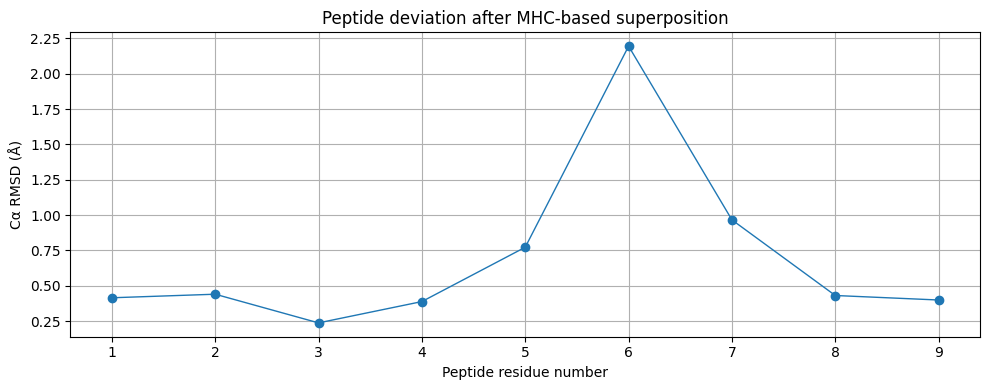

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div style='text-align:center'><h2>Multichain Atomic Coordinates (3D Scatter)</h2></div>

<div style='text-align:center'><h2>Cleaned Atomic Coordinates Table</h2></div>

atom_number atom_name residue_name  residue_number  x_coord  y_coord  \
0               1         N          GLY               1  -20.335   -7.897   
1               2        CA          GLY               1  -20.055   -8.295   
2               3         C          GLY               1  -18.574   -8.293   
3               4         O          GLY               1  -17.732   -8.209   
4               5         N          SER               2  -18.163   -8.793   
...           ...       ...          ...             ...      ...      ...   
1584         1585        CB          ILE             394    9.058   -3.848   
1585         1586         O          ILE             394   12.267   -4.035   
1586         1587       CG1          ILE             394    7.685   -3.741   
1587         1588       CG2          ILE             394    8.947   -4.534   
1588         1589       CD1          ILE             394    6.742   -2.752   

      z_coord  b_factor element_symbol  line_idx  
0      11.655     91.03              N         0  
1      10.284     91.03              C         1  
2       9.953     91.03              C         2  
3      10.850     91.03              O         3  
4       8.757     96.55              N         4  
...       ...       ...            ...       ...  
1584   -9.636     93.79              C      1584  
1585   -9.434     93.79              O      1585  
1586   -8.963     93.79              C      1586  
1587  -11.001     93.79              C      1587  
1588   -9.635     93.79              C      1588  

[1589 rows x 10 columns]

<div style='text-align:center'><h2>3D Scatter Colored by pLDDT</h2></div>

In [ ]:
data_table.enable_dataframe_formatter()

# -------------------------------
# User Input
# -------------------------------
peptide_id = "6UZ1_0"       #@param {type:"string"}
peptide_variant = 4          #@param {type:"slider", min:1, max:10, step:1}

alphafold_root = "/content/PMGen/protein_mpnn_output/alphafold"

# -------------------------------
# Validate Input
# -------------------------------
available_folders = os.listdir(alphafold_root)
matching_ids = [f for f in available_folders if f.startswith(f"{peptide_id}_")]

if not matching_ids:
    display(Markdown(f"<div style='text-align:center; color:red'><b>No AlphaFold folders found for peptide_id: {peptide_id}</b></div>"))
    raise ValueError(f"No AlphaFold folders found for peptide_id='{peptide_id}'")

display(Markdown(f"<div style='text-align:center'><h1>ProteinMPNN Variant {peptide_variant} Visualizations for Peptide: {peptide_id}</h1></div>"))

# -------------------------------
# Locate Best Structure
# -------------------------------
best_structures_dir = "/content/PMGen/output/best_structures"
best_structure_num = None

for fname in os.listdir(best_structures_dir):
    if fname.startswith(f"{peptide_id}_") and fname.endswith("_PMGen.pdb"):
        best_structure_num = int(fname.replace(f"{peptide_id}_", "").replace("_PMGen.pdb", ""))
        break

if best_structure_num is None:
    raise FileNotFoundError(f"No best structure found for {peptide_id}")

peptide_id_best = f"{peptide_id}_{best_structure_num}"

# -------------------------------
# Validate Variant Folder
# -------------------------------
variant_folders = [
    f for f in os.listdir(alphafold_root)
    if f.startswith(f"{peptide_id_best}_") and os.path.isdir(os.path.join(alphafold_root, f))
]
variant_folder_name = f"{peptide_id_best}_{peptide_variant}"

if variant_folder_name not in variant_folders:
    raise ValueError(f"Peptide variant '{peptide_variant}' not found for peptide_id '{peptide_id}' "
                     f"and structure '{best_structure_num}'")

# -------------------------------
# Define Paths
# -------------------------------
alphafold_dir = os.path.join(alphafold_root, variant_folder_name)
plddt_path = os.path.join(alphafold_dir, f"{variant_folder_name}_model_1_model_2_ptm_plddt.npy")
pdb_path = os.path.join(alphafold_dir, f"{variant_folder_name}_model_1_model_2_ptm.pdb")
pdb_colored = "/content/plddt_colored_protein_mpnn.pdb"
pae_path = os.path.join(alphafold_dir, f"{variant_folder_name}_model_1_model_2_ptm_predicted_aligned_error.npy")

ref_pdb_path = f"/content/PMGen/output/protienmpnn/{peptide_id_best}/{peptide_id_best}_model_1_model_2_ptm/multichain_pdb/multichain_{peptide_id_best}_model_1_model_2_ptm.pdb"
sample_pdb_path = f"/content/PMGen/protein_mpnn_output/protienmpnn/{variant_folder_name}/{variant_folder_name}_model_1_model_2_ptm/multichain_pdb/multichain_{variant_folder_name}_model_1_model_2_ptm.pdb"
aligned_pdb_path = f"/content/{variant_folder_name}_aligned_on_MHC.pdb"

# -------------------------------
# Color PDB by pLDDT
# -------------------------------
color_pdb_by_plddt(pdb_in=pdb_path, plddt_npy=plddt_path, pdb_out=pdb_colored)

# -------------------------------
# 3D Structure Visualization
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>3D Structure (pLDDT Coloring)</h2></div>"))
show_plddt_3d(pdb_colored)

# -------------------------------
# pLDDT Curve
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>pLDDT Per-Residue Confidence</h2></div>"))
plot_plddt_curve_interactive(plddt_path)

# -------------------------------
# Interactive PAE Heatmap
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Predicted Aligned Error (PAE) Heatmap</h2></div>"))
plot_pae_heatmap(pae_path, variant_folder_name)
# -------------------------------
# Superimposition on MHC
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Superimposition on Reference Structure</h2></div>"))
superimpose_pdb(ref_pdb_path, sample_pdb_path, peptide_id_best, peptide_variant)
print("")
view_superimposed_pdb(ref_pdb_path, aligned_pdb_path)

# -------------------------------
# Multichain 3D Scatter (Interactive)
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Multichain Atomic Coordinates (3D Scatter)</h2></div>"))
df_multichain, _ = read_pdb_to_dataframe(sample_pdb_path)

show_plotly_scatter(df_multichain, "chain_id")
# -------------------------------
# Cleaned Atomic Coordinates Table
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>Cleaned Atomic Coordinates Table</h2></div>"))
df_clean, _ = read_pdb_to_dataframe(pdb_colored)
clean_df = (
    df_clean.replace(r'^\s*$', np.nan, regex=True)
            .dropna(axis=1, how='all')
            .loc[:, lambda x: x.nunique(dropna=False) > 1]
)
display(clean_df)

# -------------------------------
# pLDDT Colored 3D Scatter
# -------------------------------
display(Markdown("<div style='text-align:center'><h2>3D Scatter Colored by pLDDT</h2></div>"))
show_plotly_scatter(df_clean, "b_factor")

# -------------------------------



----
## 7. Instructions





### 🚀 Quick Start

**Step 1 — Set up the environment**
Run all cells in **Section 1** (Installation and Environment Setup). This installs Miniconda, clones the PMGen repository, and creates the conda environment. Takes approximately 10–15 minutes on a fresh runtime.

**Step 2 — Run helper functions**
Run all cells in **Section 2** (Helper Functions). These load the utility code needed for visualization and file handling. No user input is required.

**Step 3 — Define your input and predict structures**
In **Section 3**, provide your peptide–MHC inputs. You can either:
- **Enter inputs directly** in the form fields, separating multiple entries with ` : ` (colon with spaces). Each entry requires:
  - `peptide` — Peptide sequence (uppercase letters, 8–15 residues for MHC-I, 11–30 for MHC-II)
  - `mhc_seq` — MHC sequence (for MHC-II, separate alpha/beta chains with `/`)
  - `mhc_type` — `1` for MHC-I, `2` for MHC-II
  - `anchors` *(optional)* — Anchor positions separated by `;` (e.g., `1;9`)
  - `id` — A unique identifier for each entry (e.g., `6Q3K_0`)
- **Upload a TSV file** by setting `use_tsv_file = True`. The file must have five columns: `peptide`, `mhc_seq`, `mhc_type`, `anchors`, `id`.

Run the cell to launch PMGen. Runtime depends on the number of inputs.

**Step 4 — Visualize predicted structures**
In **Section 4**, enter a `peptide_id` (matching one of your input IDs) and choose a coloring mode (`Spectrum`, `pLDDT`, or `Chains`). Run the cell to view 3D structures, confidence plots, and sequence alignments.

**Step 5 — Generate peptide variants with ProteinMPNN** *(optional)*
In **Section 5**, specify a `protein_id` and a variant selection strategy (`all`, `manual`, `top_m_similar`, or `top_m_diverse`). PMGen will design new peptide sequences and predict their structures.

**Step 6 — Visualize generated variants** *(optional)*
In **Section 6**, select a `peptide_id` and a `peptide_variant` number to inspect the variant's structure, confidence, and its superposition onto the original prediction.

> **💡 Tip:** Check `Save to Google Drive` or `Save to PC` in Sections 3 and 5 to automatically download your results before the runtime resets.

---

### 📊 Description of the Plots

#### Section 4 — Predicted Structure Visualizations

| Plot | What it shows |
|------|---------------|
| **3D Structure (Spectrum)** | Cartoon of the pMHC complex colored blue → red (N- to C-terminus). Shows the peptide path in the binding groove. |
| **3D Structure (pLDDT)** | Cartoon colored by per-residue confidence. Blue = high confidence (>90), red/orange = low (<70). |
| **Multichain Structure** | Chains colored separately: MHC in purple, peptide in yellow. |
| **3D Scatter by Chain** | Interactive scatter of all atoms colored by chain ID. Hover for residue details. |
| **3D Scatter by pLDDT** | Same scatter colored by confidence (B-factor). Spots low-confidence regions. |
| **PAE Heatmap** | Cell (i, j) = expected error of residue i aligned on j (Å). Dark off-diagonal blocks = confident inter-chain contacts. |
| **Coordinates Table** | Cleaned PDB atom records (coords, residues, chains, B-factors). Ready for inspection or export. |
| **Sequence Visualization** | Grid of original vs. variant sequences. Amino acids colored by property (hydrophobic, aromatic, polar, acidic, basic, special). |

#### Section 6 — Variant Structure Visualizations

All plots from Section 4 are repeated for the selected variant, with two additional analyses:

| Plot | What it shows |
|------|---------------|
| **pLDDT Per-Residue** | Scatter of pLDDT per residue index. Blue = confident, red = uncertain. |
| **Superimposition** | Variant (red) aligned onto original (gray) via MHC Cα. Per-residue RMSD plot shows where the peptide deviates. |


---

### 📁 Output Folder Structure

```
output/
├── pandora/              # Template structures from PANDORA
├── alphafold/            # AlphaFold-predicted pMHC structures
│   └── {id}_{model}/     # Per-input prediction folder
│       ├── *_model_1_model_2_ptm.pdb          # Predicted structure
│       ├── *_plddt.npy                         # Per-residue confidence scores
│       └── *_predicted_aligned_error.npy       # PAE matrix
├── proteinmpnn/          # ProteinMPNN-designed sequences
│   └── {id}/
│       ├── peptide_design/                     # Peptide-only redesign
│       └── only_pseudo_sequence_design/        # Pseudo-sequence redesign
└── best_structures/      # Top-ranked models (if --best_structures used)
```

---

### ⚠️ Limitations

- **Template Engineering (TE)** is not available in this notebook due to Modeller's licensing restrictions.
- **NetMHCpan anchor prediction** is not integrated due to licensing. To obtain anchor positions, use the external web services and enter the anchors manually:
  - [NetMHCpan-4.1](https://services.healthtech.dtu.dk/services/NetMHCpan-4.1/) (for MHC-I)
  - [NetMHCIIpan-4.1](https://services.healthtech.dtu.dk/services/NetMHCIIpan-4.1/) (for MHC-II)

---

### 📖 Citation

If you use PMGen in your research, please cite:

```
@article{asgary2025pmgen,
  author  = {Asgary, Amir H. and Amirreza and others},
  title   = {PMGen: From Peptide-MHC Prediction to Neoantigen Generation},
  journal = {bioRxiv},
  year    = {2025},
  month   = {11},
  date    = {2025-11-14},
  doi     = {10.1101/2025.11.14.688404},
  url     = {https://doi.org/10.1101/2025.11.14.688404},
  note    = {Preprint}
}
```

---

### 🙏 Acknowledgements

PMGen builds on the following tools and their authors:
- **PANDORA** — Antunes et al., *Frontiers in Immunology*, 2022
- **AlphaFold** — Jumper et al., *Nature*, 2021
- **AFfine** — Bradley et al., *PNAS*, 2023
- **ProteinMPNN** — Dauparas et al., *Science*, 2022

---

<p style="text-align:center;">
  This notebook is owned and maintained by
  <a href="https://github.com/soedinglab/PMGen" target="_blank">Söding Lab</a>.
</p>